## Importação

In [276]:
import networkx as nx
import random
import string
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.table import Table
from matplotlib.animation import FuncAnimation
from IPython.display import Image

#### Criando os nos/arestas aleatoriamente 

In [103]:
# Cria um grafo aleatório para o exemplo
G = nx.gnm_random_graph(26, 50)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(1, 10)

# Mapeia os nós para letras de 'A' a 'Z'
mapping = {node: string.ascii_uppercase[node] for node in G.nodes()}
G = nx.relabel_nodes(G, mapping)

## Criando o Dijkstra

In [166]:
# Calculando o caminho mais curto de A para L
shortest_path = nx.dijkstra_path(G, 'A', 'B')

Criando o grafico do Dijkstrar

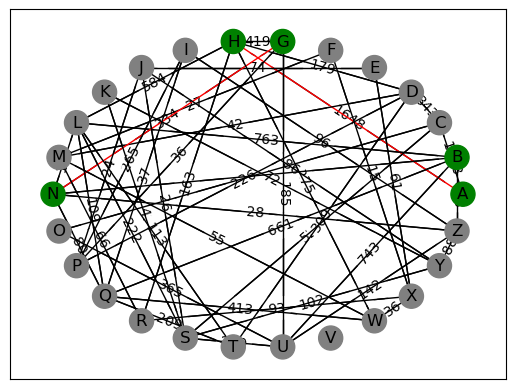

In [167]:
# Desenhando o grafo
pos = nx.circular_layout(G, scale=4)  
labels = nx.get_edge_attributes(G, 'weight')

# Alterando a cor dos nós encontrados para verde
node_colors = ['green' if node in shortest_path else 'gray' for node in G.nodes()]
nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors)

# Adicionando rótulos às arestas
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Desenhando o caminho mais curto em vermelho
shortest_path_edges = [(shortest_path[i-1], shortest_path[i]) for i in range(1, len(shortest_path))]
red_edges = [(source, target) for source, target, _ in G.edges(data=True) if (source, target) in shortest_path_edges]
edge_colors = ['red' if edge in red_edges else 'black' for edge in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)

plt.show()

In [168]:
# Obtendo a string da melhor rota
best_route = ' -> '.join(shortest_path)
print(best_route)

A -> H -> G -> N -> B


## Criando A*

In [169]:
# Calculando o caminho mais curto usando o algoritmo A*
shortest_path_astar = nx.astar_path(G, 'A', 'B', weight='weight')

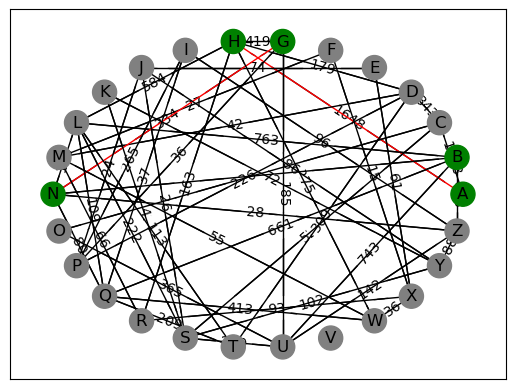

In [170]:
# Desenhando o grafo com circular_layout
pos = nx.circular_layout(G)

node_colors = ['green' if node in shortest_path_astar else 'gray' for node in G.nodes()]
nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors)

shortest_path_edges_astar = [(shortest_path_astar[i - 1], shortest_path_astar[i]) for i in range(1, len(shortest_path_astar))]
red_edges_astar = [(source, target) for source, target, _ in G.edges(data=True) if (source, target) in shortest_path_edges_astar]

edge_labels = {(source, target): data['weight'] for source, target, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

edge_colors_astar = ['red' if edge in red_edges_astar else 'black' for edge in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors_astar)

plt.show()

In [171]:
# Obtendo a string da melhor rota
best_route_astar = ' -> '.join(shortest_path_astar)
print('Melhor rota (A*):', best_route_astar)

Melhor rota (A*): A -> H -> G -> N -> B


## Batalhas entre eles

Criando o A*

In [380]:
# Definindo o número de rodadas e o incremento das penalidades
n_rounds = 20
penalty_increment = 10

Função para criar o grafico animado

MovieWriter imagemagick unavailable; using Pillow instead.
C:\Users\davim\AppData\Local\Temp\ipykernel_10992\1264819773.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Ajusta o layout para garantir que os elementos estejam bem distribuídos
C:\Users\davim\AppData\Local\Temp\ipykernel_10992\1264819773.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Ajusta o layout para garantir que os elementos estejam bem distribuídos


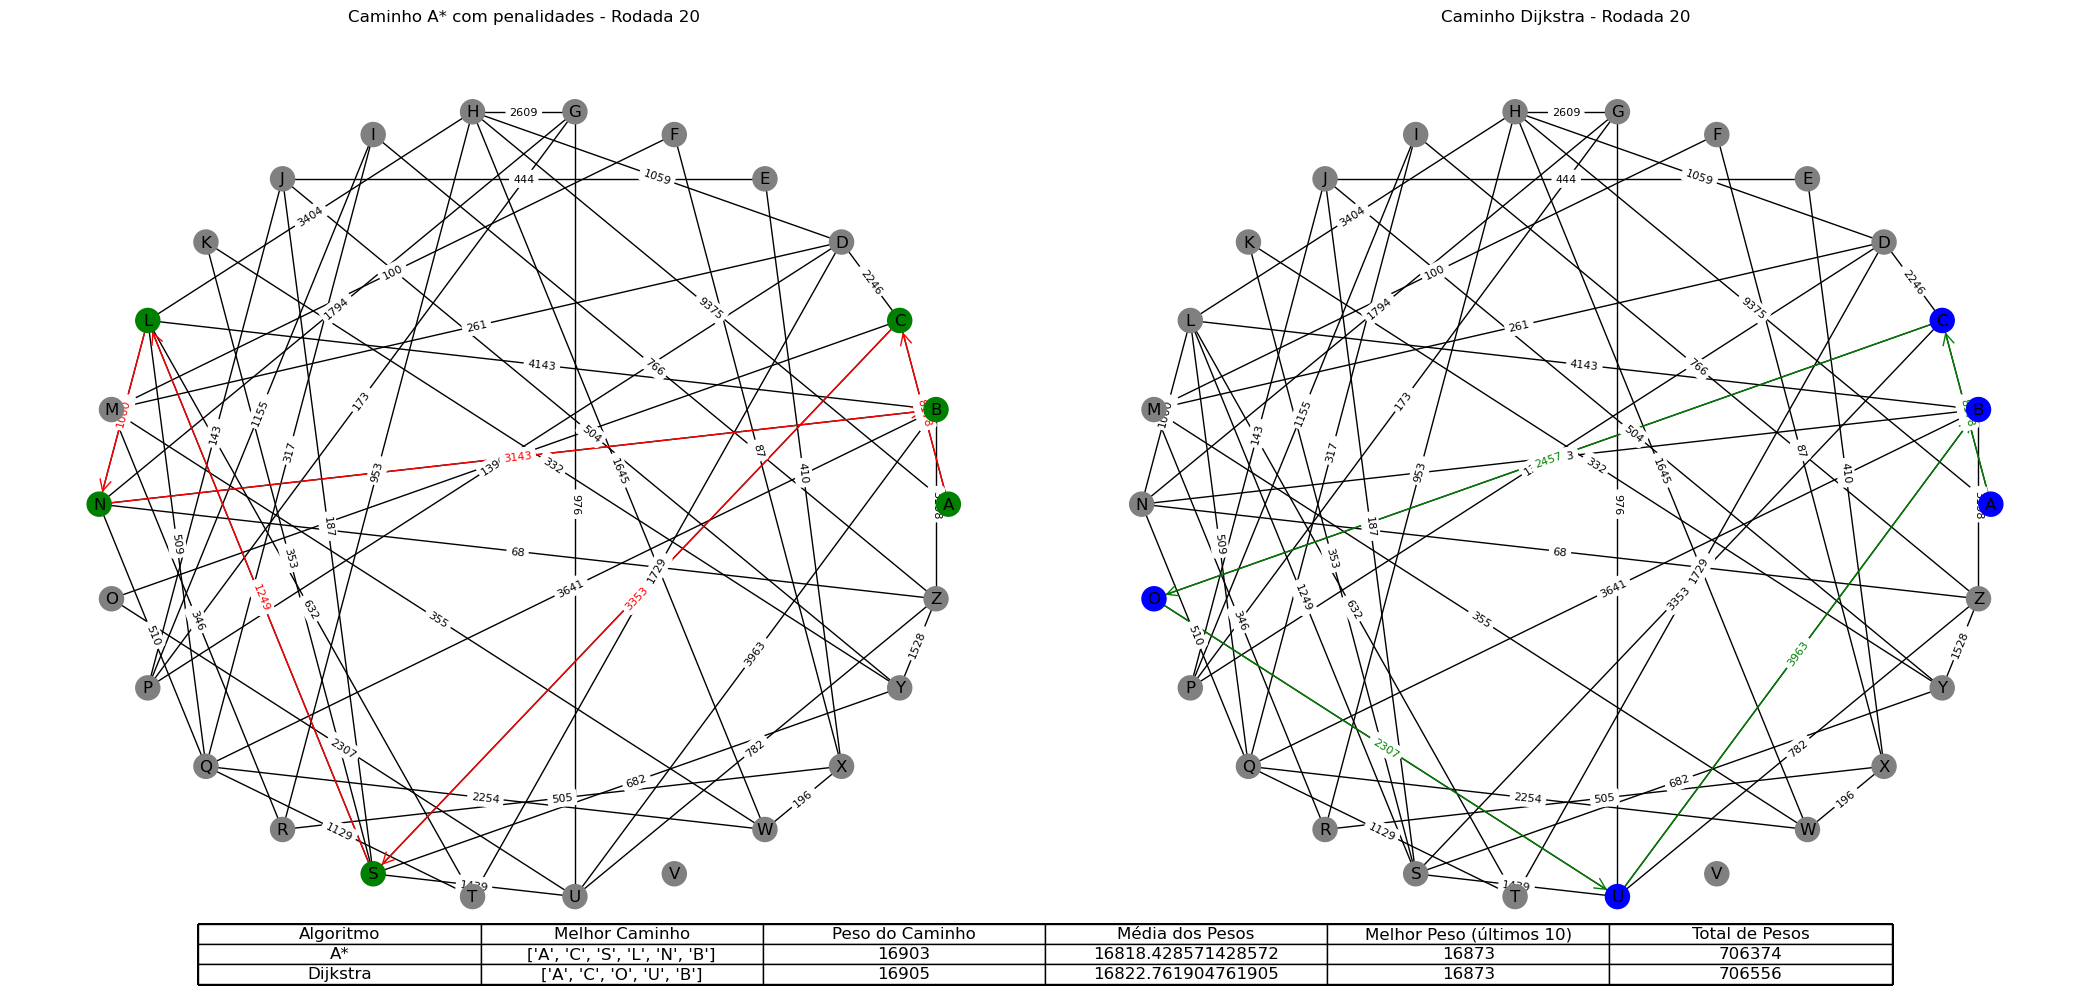

Imagem Gerado


In [381]:
fig, ax = plt.subplots(1, 2, figsize=(21, 10))  # Ajuste o tamanho da figura aqui

pesos_a_star = []
pesos_dijkstra = []

def update(frame):
    
    ax[0].clear()
    ax[1].clear()

    ax[0].set_title(f"Caminho A* com penalidades - Rodada {frame + 1}")
    ax[0].set_axis_off()

    ax[1].set_title(f"Caminho Dijkstra - Rodada {frame + 1}")
    ax[1].set_axis_off()

    # Calculando o caminho mais curto usando o algoritmo A*
    shortest_path_astar = nx.astar_path(G, "A", "B", weight="weight")
    peso_astar = nx.shortest_path_length(G, "A", "B", weight="weight")

    # Adicionando o peso do caminho A* à lista de pesos
    pesos_a_star.append(peso_astar)
    
    # Adicionando penalidades graduais em algumas arestas do caminho do A*
    for j in range(len(shortest_path_astar) - 1):
        if random.random() < 0.5:  # Aplica a penalidade em 50% das arestas do caminho
            source = shortest_path_astar[j]
            target = shortest_path_astar[j + 1]
            if G.has_edge(source, target):
                G[source][target][
                    "weight"
                ] += penalty_increment  # Incrementa o peso da aresta

    # Calculando o caminho mais curto usando o algoritmo de Dijkstra
    shortest_path_dijkstra = nx.dijkstra_path(G, "A", "B", weight="weight")
    peso_dijkstra = nx.shortest_path_length(G, "A", "B", weight="weight")

    # Adicionando o peso do caminho de Dijkstra à lista de pesos
    pesos_dijkstra.append(peso_dijkstra)

    
    # Desenhando o grafo com circular_layout
    pos = nx.circular_layout(G, scale=70)  # Aumenta a escala para espaçar os nós

    # Preparando a visualização dos caminhos
    node_colors = {"A*": [], "Dijkstra": []}
    for node in G.nodes():
        if node in shortest_path_astar:
            node_colors["A*"].append("green")
        else:
            node_colors["A*"].append("gray")
        if node in shortest_path_dijkstra:
            node_colors["Dijkstra"].append("blue")
        else:
            node_colors["Dijkstra"].append("gray")

    max_peso = max(G[u][v]['weight'] for u, v in G.edges())
    
    nx.draw_networkx(G, pos, ax=ax[0], with_labels=True, node_color=node_colors["A*"])
    edge_list_astar = [(shortest_path_astar[k], shortest_path_astar[k + 1]) for k in range(len(shortest_path_astar) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=edge_list_astar, edge_color="red", ax=ax[0], arrows=True, arrowstyle="->", arrowsize=20)
    nx.draw_networkx_edge_labels( G, pos, edge_labels=nx.get_edge_attributes(G, "weight"), font_size=8, ax=ax[0])  # Adiciona os pesos das arestas e ajusta o tamanho da fonte

    nx.draw_networkx(G, pos, ax=ax[1], with_labels=True, node_color=node_colors["Dijkstra"])
    edge_list_dijkstra = [(shortest_path_dijkstra[k], shortest_path_dijkstra[k + 1]) for k in range(len(shortest_path_dijkstra) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=edge_list_dijkstra, edge_color="green", ax=ax[1], arrows=True, arrowstyle="->", arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, "weight"), font_size=8, ax=ax[1])  # Adiciona os pesos das arestas e ajusta o tamanho da fonte

    # Set font color based on path inclusion
    font_color = "Black"  # Default color

    # Iterate over the edges in the A* path
    for edge in edge_list_astar:
        if edge in G.edges():
            font_color = "red"  # Replace with your A* color

        # Draw the edge label
        nx.draw_networkx_edge_labels(
            G, pos, edge_labels={edge: G[edge[0]][edge[1]]["weight"]}, font_size=8, font_color=font_color, ax=ax[0]
        )

    # Iterate over the edges in the Dijkstra path
    for edge in edge_list_dijkstra:
        if edge in G.edges():
            font_color = "green"  # Replace with your Dijkstra color

        # Draw the edge label
        nx.draw_networkx_edge_labels(
            G, pos, edge_labels={edge: G[edge[0]][edge[1]]["weight"]}, font_size=8, font_color=font_color, ax=ax[1]
        )

    # Atualizando a tabela com as novas informações
    media_pesos_astar = sum(pesos_a_star) / len(pesos_a_star) if pesos_a_star else 0
    media_pesos_dijkstra = sum(pesos_dijkstra) / len(pesos_dijkstra) if pesos_dijkstra else 0

    ultimos_10_pesos_astar = pesos_a_star[-10:] if len(pesos_a_star) >= 10 else pesos_a_star
    melhor_peso_ultimos_10_astar = min(ultimos_10_pesos_astar) if ultimos_10_pesos_astar else 0

    ultimos_10_pesos_dijkstra = pesos_dijkstra[-10:] if len(pesos_dijkstra) >= 10 else pesos_dijkstra
    melhor_peso_ultimos_10_dijkstra = min(ultimos_10_pesos_dijkstra) if ultimos_10_pesos_dijkstra else 0

    total_pesos_astar = sum(pesos_a_star)
    total_pesos_dijkstra = sum(pesos_dijkstra)

    plt.tight_layout()  # Ajusta o layout para garantir que os elementos estejam bem distribuídos

    
    table_data = [
        ["Algoritmo", "Melhor Caminho", "Peso do Caminho", "Média dos Pesos", "Melhor Peso (últimos 10)", "Total de Pesos"],
        ["A*", shortest_path_astar, peso_astar, media_pesos_astar, melhor_peso_ultimos_10_astar, total_pesos_astar],
        ["Dijkstra", shortest_path_dijkstra, peso_dijkstra, media_pesos_dijkstra, melhor_peso_ultimos_10_dijkstra, total_pesos_dijkstra],
    ]
    
    # Configurações da tabela
    cell_text = table_data
    columns = len(cell_text[0])
    rows = len(cell_text)

    # Criando a área onde a tabela será desenhada
    table_area = fig.add_axes([0.1, 0.07, 0.8, 0.1])  # Ajuste os valores conforme necessário

    # Ocultando e removendo eixos
    table_area.get_xaxis().set_visible(False)
    table_area.get_yaxis().set_visible(False)
    table_area.set_frame_on(False)

    # Defina os tamanhos desejados para cada coluna
    col_widths  = [0.14, 0.14, 0.14, 0.14, 0.14, 0.14]  # Ajuste os valores conforme necessário
    
    # Criando a tabela
    table = plt.table(cellText=table_data, loc='bottom', cellLoc='center', colWidths=col_widths)

    # Configurando a tabela
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2,1.2)  # Ajuste o tamanho da tabela conforme necessário
    
    # Ocultando e removendo eixos dos gráficos
    for a in ax:
        a.set_axis_off()
    
    # Atualiza a figura
    fig.canvas.draw()

    # Salva o frame atual como uma imagem (por exemplo, PNG)
    filename = f"img/frame_{frame:04d}.png"  # Nomenclatura para os frames
    plt.savefig(filename)
    
anim = FuncAnimation(fig, update, frames=n_rounds, interval=550)

# Salva a animação como um arquivo GIF
anim.save("img/animation.gif", writer="imagemagick")
anim.save("img/animation2.mp4", writer="ffmpeg")

# Exibe o GIF no notebook Jupyter
Image(filename="img/animation.gif")
plt.show()

print("Imagem Gerado")

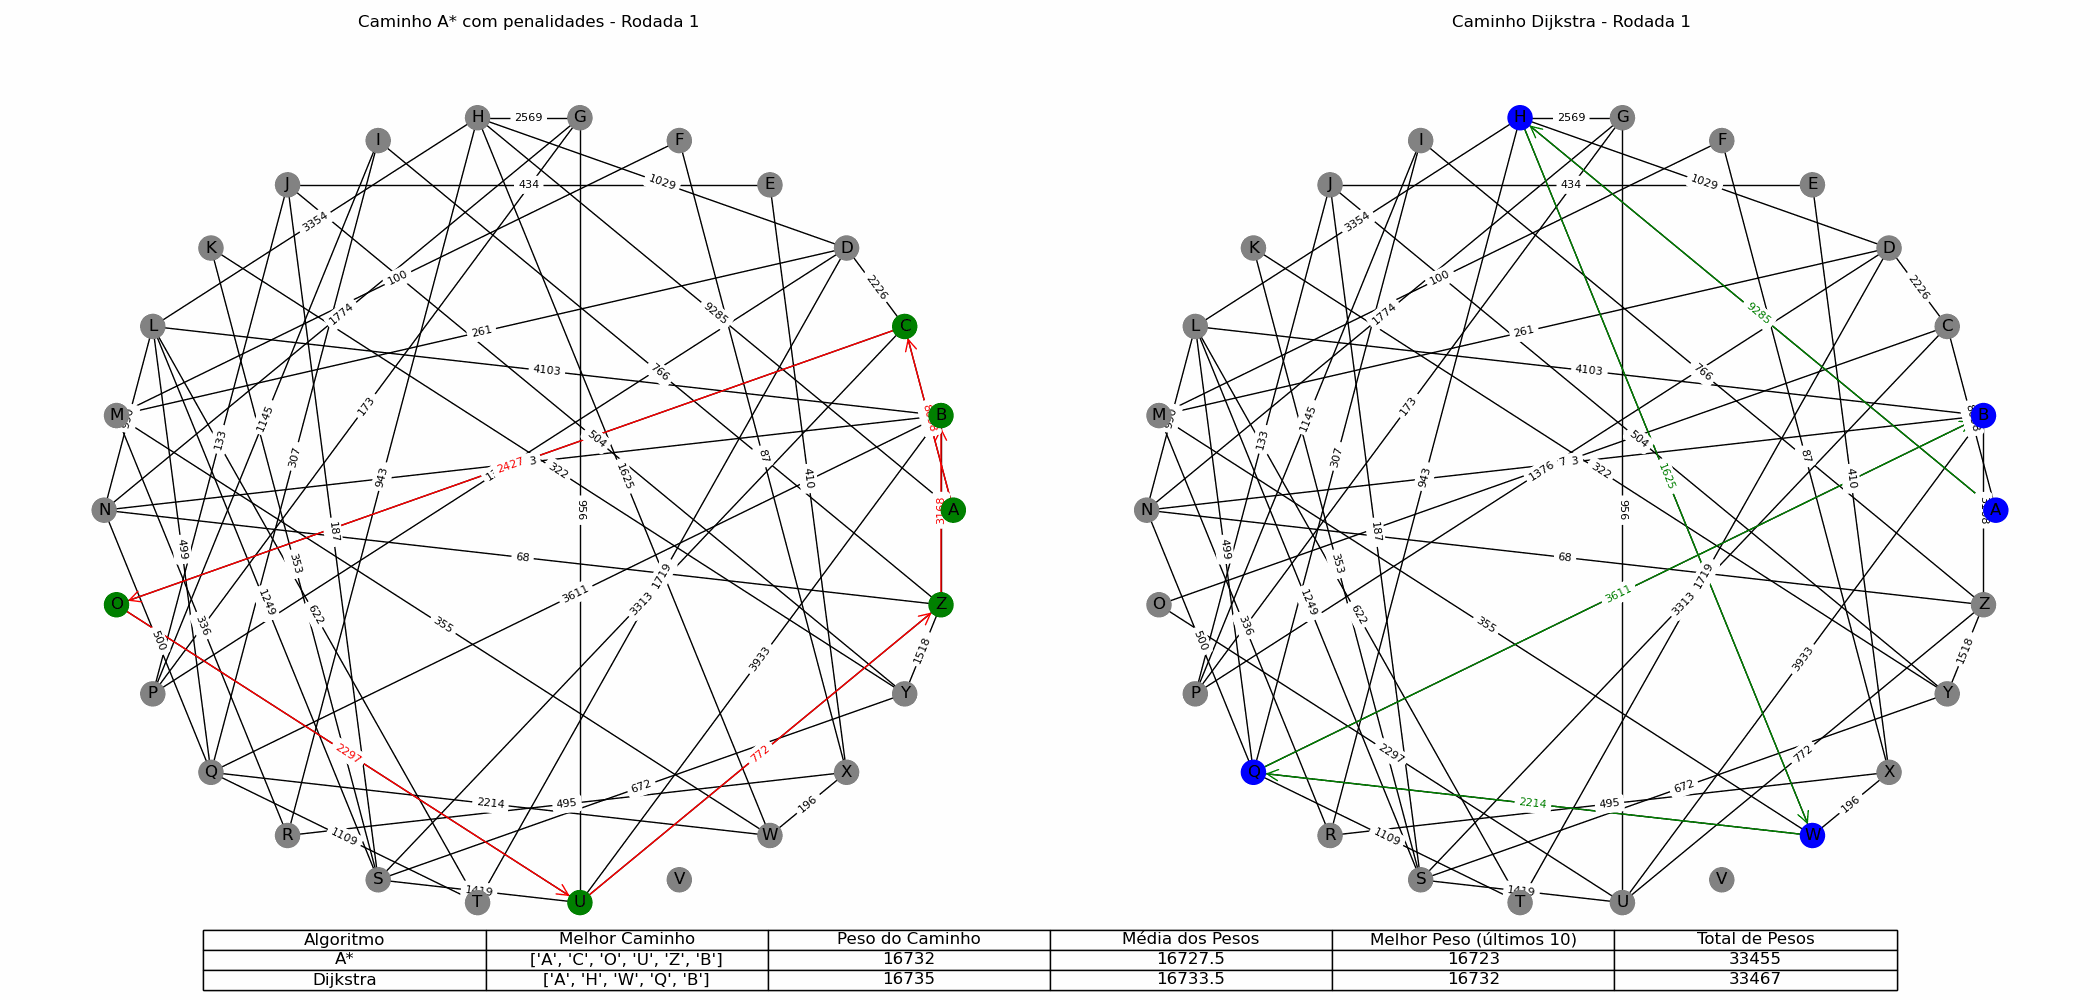

In [382]:
Image(filename="animation.gif")